# Tarea: Modelos lineales, regularizaci√≥n y selecci√≥n de modelos en datos reales

Importamos las librerias necesaria 

In [225]:
#Reseteamos el entorno
%reset -f 


In [227]:
#importamos las librerias necesarias
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import RidgeCV, LassoCV, LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.pipeline import Pipeline

## Parte A: Parte A. Regresi√≥n lineal desde cero


1. Usando LinearRegression de sklearn

In [228]:
# Paso 2: Cargamos el dataset
data = fetch_california_housing(as_frame=True)
X = data.data
y = data.target.values
data.frame.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

In [229]:
# Paso 3: Creamos el conjunto de entrenamiento y prueba
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [230]:
# Paso 4: Estandarizamos caracter√≠sticas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [231]:
# 4. Ajustar modelo de sklearn
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

LinearRegression()

In [232]:
# 5. Predicciones
y_pred = linreg.predict(X_test_scaled)
print("R2 sklearn:", r2_score(y_test, y_pred))
print("MSE sklearn:", mean_squared_error(y_test, y_pred))

R2 sklearn: 0.5757877060324508
MSE sklearn: 0.5558915986952444


In [233]:
# 6. M√©tricas
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Intercepto (sklearn):", linreg.intercept_)
print("Coeficientes (sklearn):", linreg.coef_)
print("R¬≤ (sklearn):", r2)
print("MSE (sklearn):", mse)

Intercepto (sklearn): 2.0719469373788777
Coeficientes (sklearn): [ 0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772 -0.0408291
 -0.89692888 -0.86984178]
R¬≤ (sklearn): 0.5757877060324508
MSE (sklearn): 0.5558915986952444


2. MCO de forma cerrada (Closed-form OLS con NumPy)

In [234]:
# Aseg√∫rate de tener X_train_scaled, X_test_scaled e incluir columna de 1s para el intercepto manual
X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train_scaled]
X_test_bias  = np.c_[np.ones((X_test.shape[0], 1)),  X_test_scaled]

In [235]:
# F√≥rmula Œ≤ = (X·µÄX)^(-1) X·µÄy
beta_hat = np.linalg.inv(X_train_bias.T @ X_train_bias) @ (X_train_bias.T @ y_train)

intercept_ols = beta_hat[0]
coef_ols = beta_hat[1:]
y_pred_ols = X_test_bias @ beta_hat

print("Intercepto OLS:", intercept_ols)
print("Coeficientes OLS:", coef_ols)
print("R2 OLS:", r2_score(y_test, y_pred_ols))


Intercepto OLS: 2.071946937378877
Coeficientes OLS: [ 0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772 -0.0408291
 -0.89692888 -0.86984178]
R2 OLS: 0.5757877060324512


In [236]:

# Beta por forma cerrada con pseudoinversa
beta_hat = np.linalg.pinv(X_train_bias.T @ X_train_bias) @ (X_train_bias.T @ y_train)
intercept_ols_manual = beta_hat[0]
coef_ols_manual = beta_hat[1:]

In [237]:
# Predicci√≥n y m√©tricas en test
y_pred_ols_manual = X_test_bias @ beta_hat
r2_ols = r2_score(y_test, y_pred_ols_manual)
mse_ols = mean_squared_error(y_test, y_pred_ols_manual)

print(f"OLS (manual) ‚Äî Intercepto: {intercept_ols_manual:.6f}")
print(f"OLS (manual) ‚Äî R2 test: {r2_ols:.4f} | MSE test: {mse_ols:.4f}")

OLS (manual) ‚Äî Intercepto: 2.071947
OLS (manual) ‚Äî R2 test: 0.5758 | MSE test: 0.5559


In [238]:
# Verificaci√≥n contra sklearn LinearRegression
lin = LinearRegression(fit_intercept=True)
lin.fit(X_train_scaled, y_train)
print("\nComparaci√≥n con sklearn.LinearRegression")
print("M√°x. |dif coef|:", float(np.max(np.abs(coef_ols_manual - lin.coef_))))
print("Dif intercepto :", float(abs(intercept_ols_manual - lin.intercept_)))


Comparaci√≥n con sklearn.LinearRegression
M√°x. |dif coef|: 3.4416913763379853e-15
Dif intercepto : 2.6645352591003757e-15


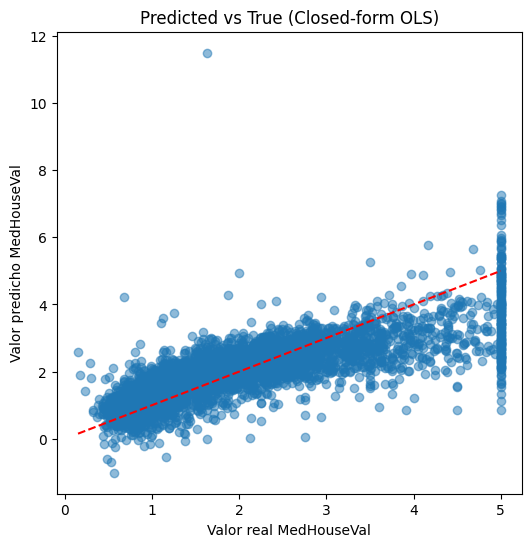

In [239]:
# Plot pred vs real
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_ols, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], "r--")
plt.xlabel("Valor real MedHouseVal")
plt.ylabel("Valor predicho MedHouseVal")
plt.title("Predicted vs True (Closed-form OLS)")
plt.show()

3. Descenso de gradiente (implementaci√≥n desde cero)

In [240]:
# Funci√≥n de costo MSE

def mse(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    return np.mean((y_true - y_pred) ** 2)

In [241]:
# === Descenso de gradiente para MSE ===
def gradient_descent(X, y, lr=0.01, n_iter=1000, tol=1e-8, verbose=False):
    """
    X debe incluir columna de 1s si se desea intercepto.
    """
    n, d = X.shape
    theta = np.zeros(d)
    cost_history = []
    for it in range(n_iter):
        y_pred = X @ theta
        grad = (X.T @ (y_pred - y)) / n
        theta -= lr * grad
        J = 0.5 * mse(y, y_pred)  # 1/(2n) * ||Xtheta - y||^2  -> sin dividir por n porque mse ya divide
        cost_history.append(J)
        if it > 0 and abs(cost_history[-2] - cost_history[-1]) < tol:
            if verbose:
                print(f"Early stop en iter {it}")
            break
    return theta, np.array(cost_history)


In [242]:
# Aplicar con datos estandarizados (agregando bias)
X_train_bias = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_bias  = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]
# Dos tasas de aprendizaje
theta_lr1, cost1 = gradient_descent(X_train_bias, y_train, lr=0.01, n_iter=3000)
theta_lr2, cost2 = gradient_descent(X_train_bias, y_train, lr=0.1,  n_iter=3000)

In [243]:
# Predicciones
y_pred_gd1 = X_test_bias @ theta_lr1
y_pred_gd2 = X_test_bias @ theta_lr2

print("R2 GD (lr=0.01):", r2_score(y_test, y_pred_gd1))
print("R2 GD (lr=0.1):", r2_score(y_test, y_pred_gd2))


R2 GD (lr=0.01): 0.5765871538425514
R2 GD (lr=0.1): 0.5756765644599728


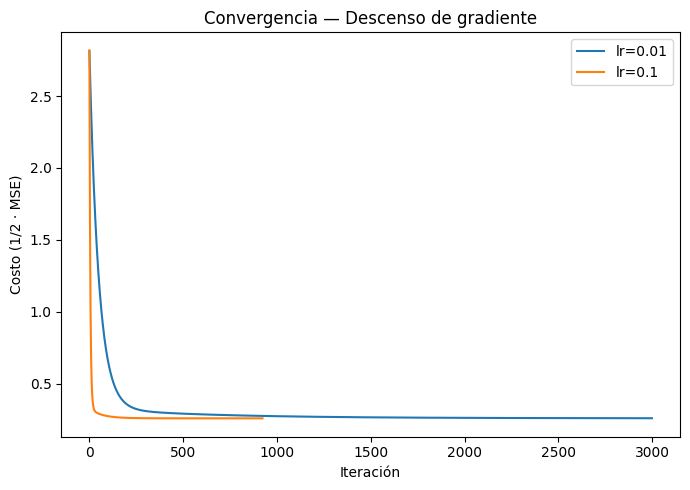

In [244]:

plt.figure(figsize=(7,5))
plt.plot(cost1, label="lr=0.01")
plt.plot(cost2, label="lr=0.1")
plt.xlabel("Iteraci√≥n")
plt.ylabel("Costo (1/2 ¬∑ MSE)")
plt.title("Convergencia ‚Äî Descenso de gradiente")
plt.legend()
plt.tight_layout()
plt.show()

GD lr=0.01: R2 test = 0.5766 | MSE test = 0.5548
GD lr=0.1: R2 test = 0.5757 | MSE test = 0.5560


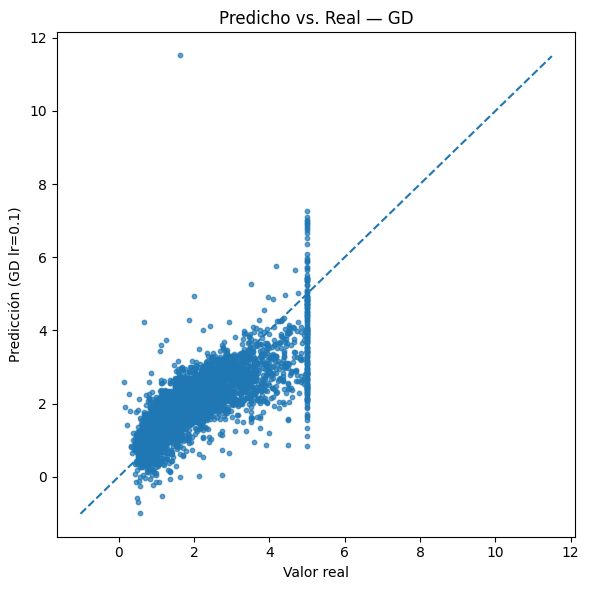

In [245]:
# === Predicho vs Real (GD) y m√©tricas ===
for name, theta in [("GD lr=0.01", theta_lr1), ("GD lr=0.1", theta_lr2)]:
    y_pred = X_test_bias @ theta
    r2 = r2_score(y_test, y_pred)
    m = mean_squared_error(y_test, y_pred)
    print(f"{name}: R2 test = {r2:.4f} | MSE test = {m:.4f}")

plt.figure(figsize=(6,6))
plt.scatter(y_test, X_test_bias @ theta_lr2, s=10, alpha=0.7)
lims = [min(y_test.min(), y_pred_ols_manual.min()), max(y_test.max(), y_pred_ols_manual.max())]
plt.plot(lims, lims, linestyle="--")
plt.xlabel("Valor real")
plt.ylabel("Predicci√≥n (GD lr=0.1)")
plt.title("Predicho vs. Real ‚Äî GD")
plt.tight_layout()
plt.show()

## Parte B. Modelos lineales de Scikit-learn

In [246]:
# 1. Cargar datos
data = fetch_california_housing(as_frame=True)
X = data.data
y = data.target.values
data.frame.head()



MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

In [247]:
# 2. Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [248]:
# 3. Estandarizar caracter√≠sticas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [249]:

# 4. Ajustar modelo de sklearn
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)


LinearRegression()

In [250]:
# 5. Predicciones
y_pred = linreg.predict(X_test_scaled)
print("R2 sklearn:", r2_score(y_test, y_pred))
print("MSE sklearn:", mean_squared_error(y_test, y_pred))


R2 sklearn: 0.5757877060324508
MSE sklearn: 0.5558915986952444


In [251]:
# 6. M√©tricas
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Intercepto (sklearn):", linreg.intercept_)
print("Coeficientes (sklearn):", linreg.coef_)
print("R¬≤ (sklearn):", r2)
print("MSE (sklearn):", mse)



Intercepto (sklearn): 2.0719469373788777
Coeficientes (sklearn): [ 0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772 -0.0408291
 -0.89692888 -0.86984178]
R¬≤ (sklearn): 0.5757877060324508
MSE (sklearn): 0.5558915986952444


## Parte C. Regularizaci√≥n y elecci√≥n de hiperpar√°metros

5. Ridge y Lasso

In [252]:

# Valores de alpha log-espaciados entre 1e-3 y 1e2
feature_names = getattr(data, "feature_names", [f"x{i}" for i in range(X.shape[1])])

alphas = np.logspace(-3, 2, 100)
coefs_ridge = []
coefs_lasso = []

for a in alphas:
    rr = Ridge(alpha=a, random_state=42).fit(X_train_scaled, y_train)
    ll = Lasso(alpha=a, max_iter=10000, random_state=42).fit(X_train_scaled, y_train)
    coefs_ridge.append(rr.coef_)
    coefs_lasso.append(ll.coef_)

coefs_ridge = np.array(coefs_ridge)
coefs_lasso = np.array(coefs_lasso)


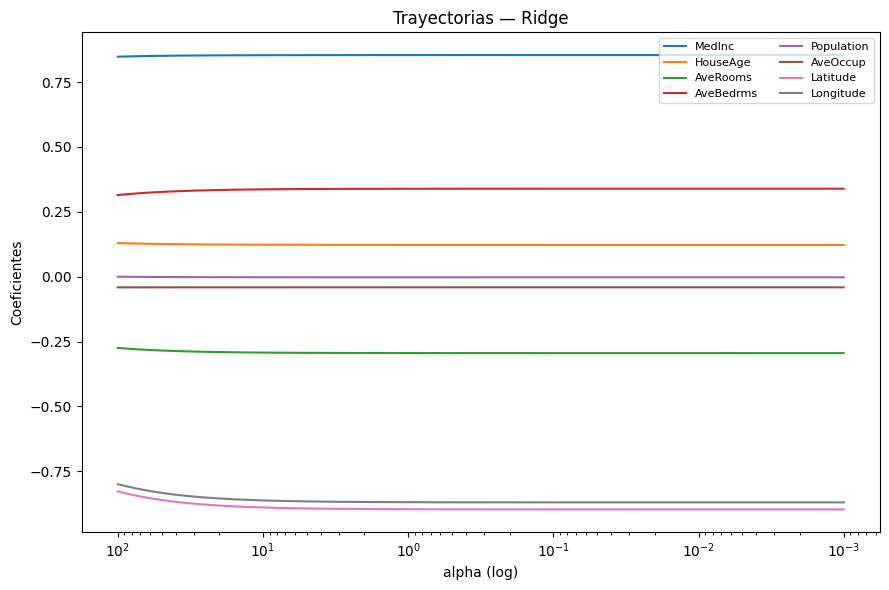

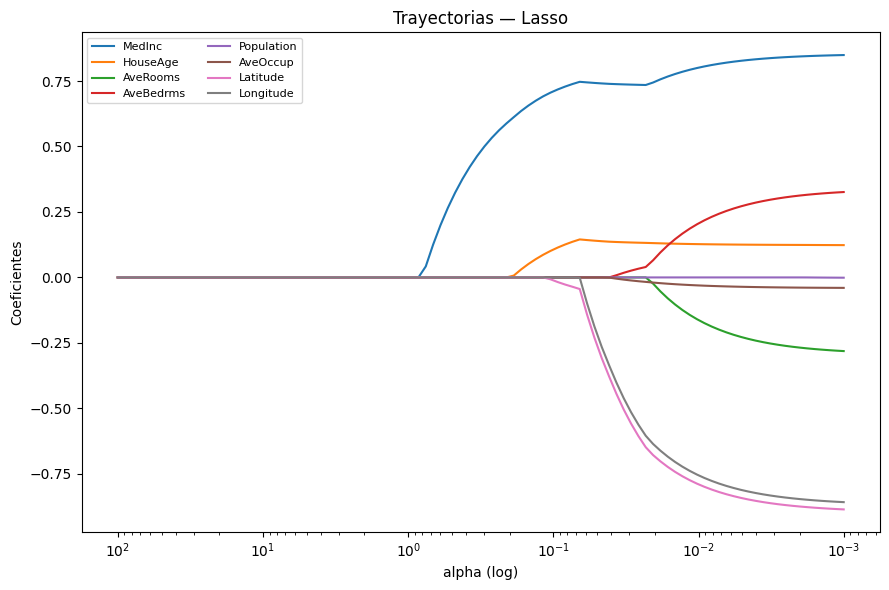

In [253]:
plt.figure(figsize=(9,6))
for j, name in enumerate(feature_names):
    plt.plot(alphas, coefs_ridge[:, j], label=name if j < 10 else None)  # para no saturar la leyenda
plt.xscale("log")
plt.gca().invert_xaxis()
plt.xlabel("alpha (log)")
plt.ylabel("Coeficientes")
plt.title("Trayectorias ‚Äî Ridge")
plt.legend(fontsize=8, ncol=2, loc="best")
plt.tight_layout()
plt.show()

plt.figure(figsize=(9,6))
for j, name in enumerate(feature_names):
    plt.plot(alphas, coefs_lasso[:, j], label=name if j < 10 else None)
plt.xscale("log")
plt.gca().invert_xaxis()
plt.xlabel("alpha (log)")
plt.ylabel("Coeficientes")
plt.title("Trayectorias ‚Äî Lasso")
plt.legend(fontsize=8, ncol=2, loc="best")
plt.tight_layout()
plt.show()

Al graficar la evoluci√≥n de los coeficientes frente al par√°metro de regularizaci√≥n 
ùõº
Œ± (entre 
10
‚àí
3
10
‚àí3
 y 
10
2
10
2
) se observa lo siguiente:

- Ridge: 
todos los coeficientes se reducen en magnitud de manera suave a medida que aumenta 
ùõº
Œ±. Sin embargo, ninguno de ellos llega exactamente a cero. Esto significa que el modelo Ridge conserva todas las variables explicativas, aunque las penaliza para evitar sobreajuste y controlar la multicolinealidad.
- Lasso: 
a diferencia de Ridge, algunos coeficientes s√≠ se reducen exactamente a cero cuando 
ùõº
Œ± crece. Esto implica que Lasso realiza autom√°ticamente selecci√≥n de variables, descartando aquellas con menor poder explicativo sobre el valor medio de la vivienda. En este dataset, se aprecia que las variables con menor correlaci√≥n con la variable objetivo son las primeras en ser eliminadas, mientras que las m√°s relevantes (por ejemplo, MedInc, el ingreso medio de la zona) mantienen coeficientes distintos de cero incluso con alta penalizaci√≥n.
En conclusi√≥n, Ridge estabiliza el modelo sin eliminar predictores, mientras que Lasso promueve la parsimonia reduciendo a cero los coeficientes de variables poco informativas.

6. Validaci√≥n cruzada (KFold + cross_val_score vs RidgeCV / LassoCV)

In [254]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, make_scorer


In [255]:
# Definimos CV
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

In [256]:
# RidgeCV y LassoCV seleccionan alpha √≥ptimo
# Entrenar CV sobre datos ESTANDARIZADOS
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train_scaled, y_train)

lasso_cv = LassoCV(alphas=alphas, cv=5, max_iter=20000, random_state=42)
lasso_cv.fit(X_train_scaled, y_train)

def eval_model(name, y_true, y_pred, coef=None):
    r2 = r2_score(y_true, y_pred)
    m = mean_squared_error(y_true, y_pred)
    nnz = None if coef is None else int(np.sum(np.abs(coef) > 1e-12))
    return dict(Model=name, R2_test=round(r2,4), MSE_test=round(m,4), Coef_no_cero=nnz)

rows = []
# Modelo OLS
#y_pred_ols = linreg.predict(X_test_scaled)
#rows.append(eval_model("OLS", y_test, y_pred_ols, linreg.coef_))    
# Modelo Ridge
#y_pred_ridge = ridge_cv.predict(X_test_scaled)
#rows.append(eval_model(f"Ridge (Œ±={ridge_cv.alpha_:.4f})", y_test, y_pred_ridge, ridge_cv.coef_))
# Modelo Lasso
#y_pred_lasso = lasso_cv.predict(X_test_scaled)
#rows.append(eval_model(f"Lasso (Œ±={lasso_cv.alpha_:.4f})))", y_test, y_pred_lasso, lasso_cv.coef_))
# Mostrar resultados
#results_df = pd.DataFrame(rows)
#print(results_df)   


In [257]:
# OLS manual
rows.append(eval_model("OLS manual", y_test, y_pred_ols_manual, coef_ols_manual))

# GD (se elige la mejor thetas; usamos lr=0.1)
y_pred_gd = X_test_bias @ theta_lr2
rows.append(eval_model("GD (lr=0.1)", y_test, y_pred_gd, theta_lr2[1:]))

# RidgeCV / LassoCV
y_pred_ridge = ridge_cv.predict(X_test_scaled)
rows.append(eval_model(f"RidgeCV (alpha={ridge_cv.alpha_:.4g})", y_test, y_pred_ridge, ridge_cv.coef_))

y_pred_lasso = lasso_cv.predict(X_test_scaled)
rows.append(eval_model(f"LassoCV (alpha={lasso_cv.alpha_:.4g})", y_test, y_pred_lasso, lasso_cv.coef_))

df_cmp = pd.DataFrame(rows)
df_cmp

Model  R2_test  MSE_test  Coef_no_cero
0             OLS manual   0.5758    0.5559             8
1            GD (lr=0.1)   0.5757    0.5560             8
2  RidgeCV (alpha=0.001)   0.5758    0.5559             8
3  LassoCV (alpha=0.001)   0.5769    0.5545             8

7. Ingenier√≠a de caracter√≠sticas y multicolinealidad (PolynomialFeatures)

In [258]:
# ======================================================
# 1) Generar caracter√≠sticas polinomiales (grado 2)
# ======================================================
poly = PolynomialFeatures(degree=2, include_bias=False)

X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly  = poly.transform(X_test_scaled)

print("Dimensiones originales:", X_train_scaled.shape)
print("Dimensiones polinomiales:", X_train_poly.shape)


Dimensiones originales: (16512, 8)
Dimensiones polinomiales: (16512, 44)


In [259]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# ======================================================
# 2) Escalar nuevamente (muy importante para Lasso/Ridge)
# ======================================================
scaler_poly = StandardScaler()
X_train_poly_scaled = scaler_poly.fit_transform(X_train_poly)
X_test_poly_scaled  = scaler_poly.transform(X_test_poly)

In [260]:
# ======================================================
# 3) Definir alphas (barrido amplio inicial)
# ======================================================
alphas = np.logspace(-6, 3, 200)  # de 1e-6 a 1e3


In [261]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.model_selection import KFold
# ======================================================
# 4) Ajustar RidgeCV y LassoCV
# ======================================================
ridge_poly = RidgeCV(alphas=alphas, scoring=mse_scorer, cv=kf)
ridge_poly.fit(X_train_poly_scaled, y_train)

lasso_poly = LassoCV(alphas=alphas, cv=kf, max_iter=50000, tol=1e-4)
lasso_poly.fit(X_train_poly_scaled, y_train)


LassoCV(alphas=array([   0.000001  ,    0.00000111,    0.00000123,    0.00000137,
          0.00000152,    0.00000168,    0.00000187,    0.00000207,
          0.0000023 ,    0.00000255,    0.00000283,    0.00000314,
          0.00000349,    0.00000387,    0.0000043 ,    0.00000477,
          0.00000529,    0.00000587,    0.00000652,    0.00000723,
          0.00000803,    0.00000891,    0.00000988,    0.00001097,
          0.00001217,    0.00001351,    0.00001499,    0.00001664,
          0.00001846,    0.00002049,    0....
         91.158883  ,  101.16379798,  112.26677735,  124.58833643,
        138.26221738,  153.43684089,  170.27691722,  188.96523397,
        209.70464013,  232.7202479 ,  258.26187607,  286.60676169,
        318.06256928,  352.97073027,  391.71014908,  434.70131581,
        482.41087042,  535.35666774,  594.1133985 ,  659.31882713,
        731.68071434,  811.98449932,  901.10182517, 1000.        ]),
        cv=KFold(n_splits=5, random_state=42, shuffle=True), max_iter=50000)

In [262]:
# ======================================================
# 5) Crear tabla comparativa
# ======================================================
results = pd.DataFrame([
    {
        "Modelo": "Ridge (polinomial)",
        "Alpha √≥ptimo": ridge_poly.alpha_,
        "MSE test": mean_squared_error(y_test, ridge_poly.predict(X_test_poly_scaled))
    },
    {
        "Modelo": "Lasso (polinomial)",
        "Alpha √≥ptimo": lasso_poly.alpha_,
        "MSE test": mean_squared_error(y_test, lasso_poly.predict(X_test_poly_scaled))
    }
])

display(results)

Modelo  Alpha √≥ptimo  MSE test
0  Ridge (polinomial)     66.699197  0.442864
1  Lasso (polinomial)      0.008603  0.542800

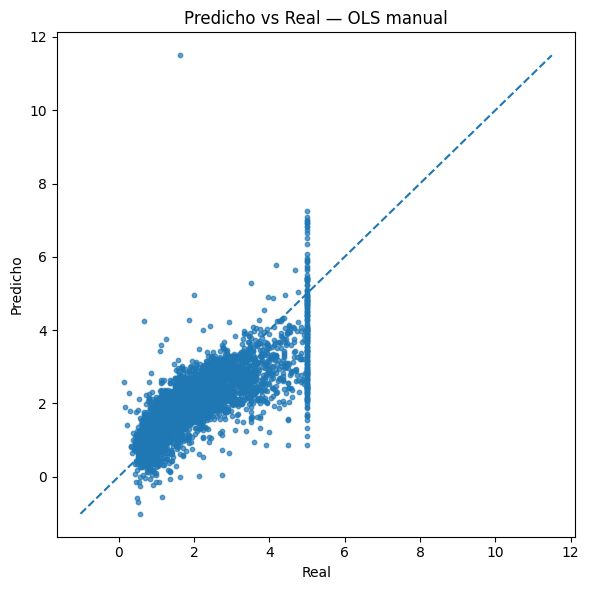

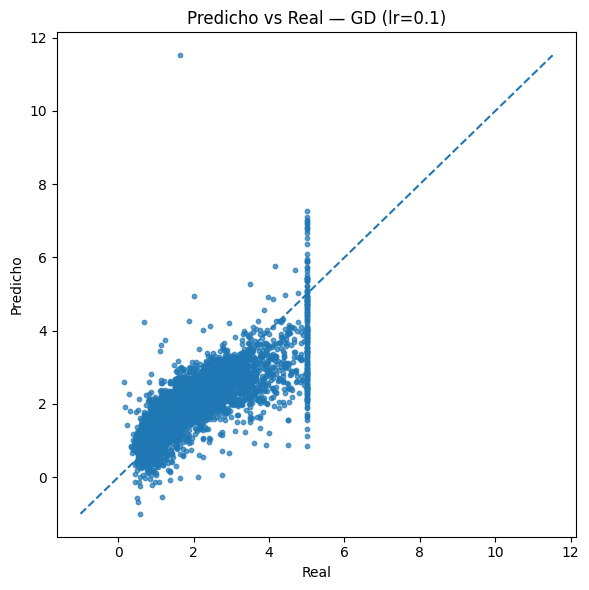

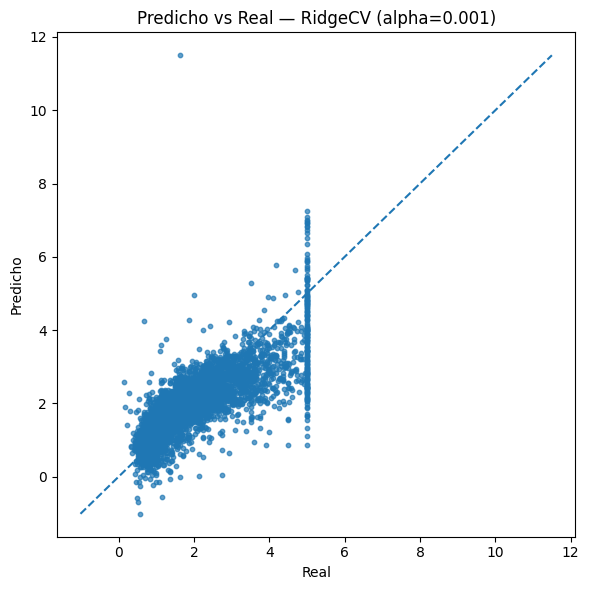

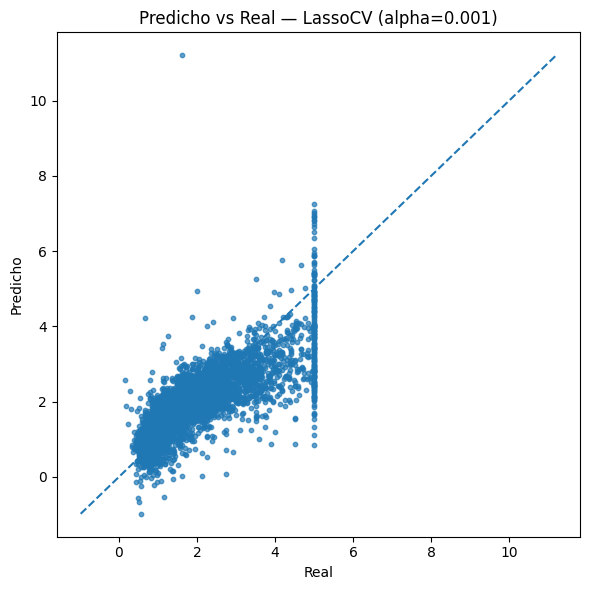

In [263]:
#Gr√°fica ‚ÄúPredicho vs Real‚Äù para cada modelo
def plot_pred_true(y_true, y_pred, title):
    plt.figure(figsize=(6,6))
    plt.scatter(y_true, y_pred, s=10, alpha=0.7)
    lims = [min(y_true.min(), y_pred.min()), max(y_true.max(), y_pred.max())]
    plt.plot(lims, lims, '--')
    plt.xlabel("Real")
    plt.ylabel("Predicho")
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_pred_true(y_test, y_pred_ols_manual, "Predicho vs Real ‚Äî OLS manual")
plot_pred_true(y_test, X_test_bias @ theta_lr2, "Predicho vs Real ‚Äî GD (lr=0.1)")
plot_pred_true(y_test, y_pred_ridge, f"Predicho vs Real ‚Äî RidgeCV (alpha={ridge_cv.alpha_:.4g})")
plot_pred_true(y_test, y_pred_lasso, f"Predicho vs Real ‚Äî LassoCV (alpha={lasso_cv.alpha_:.4g})")


## Parte D. Alquiler de bicicletas

1. Carga y exploraci√≥n de datos

In [264]:
# Importamos librer√≠as
import pandas as pd
import numpy as np
from pathlib import Path

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, LassoCV, lasso_path
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt


In [265]:
# Cargar dataset horario
hour = pd.read_csv("data/hour.csv")   # <-- esta es la ruta correcta
hour.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [266]:
# fecha y agregado a diario
hour['dteday'] = pd.to_datetime(hour['dteday'])
daily = (hour
         .groupby('dteday', as_index=False)
         .agg(cnt=('cnt','sum'),
              temp=('temp','mean'),
              atemp=('atemp','mean'),
              hum=('hum','mean'),
              windspeed=('windspeed','mean'),
              season=('season','first'),
              mnth=('mnth','first'),
              weekday=('weekday','first'),
              workingday=('workingday','first'),
              weathersit=('weathersit','first'))
         .sort_values('dteday')
         .reset_index(drop=True))

print("Daily:", daily.shape, "|", daily['dteday'].min().date(), "‚Üí", daily['dteday'].max().date())
daily.head(3)

Daily: (731, 11) | 2011-01-01 ‚Üí 2012-12-31


dteday   cnt      temp     atemp       hum  windspeed  season  mnth  \
0 2011-01-01   985  0.344167  0.363625  0.805833   0.160446       1     1   
1 2011-01-02   801  0.363478  0.353739  0.696087   0.248539       1     1   
2 2011-01-03  1349  0.196364  0.189405  0.437273   0.248309       1     1   

   weekday  workingday  weathersit  
0        6           0           1  
1        0           0           2  
2        1           1           1

Estacionalidad y serie temporal

In [267]:
# --- D.2: Estacionalidad + serie temporal ---
import matplotlib.pyplot as plt

daily_ts = daily.set_index('dteday').copy()
daily_ts['cnt_ma7'] = daily_ts['cnt'].rolling(7, min_periods=1).mean()


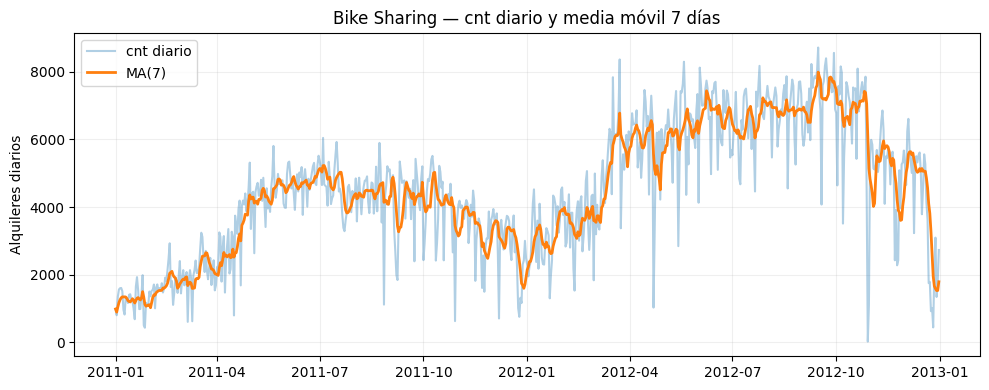

In [268]:
# Serie temporal + media m√≥vil
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(daily_ts.index, daily_ts['cnt'], alpha=0.35, label='cnt diario')
ax.plot(daily_ts.index, daily_ts['cnt_ma7'], lw=2, label='MA(7)')
ax.set_title("Bike Sharing ‚Äî cnt diario y media m√≥vil 7 d√≠as")
ax.set_ylabel("Alquileres diarios")
ax.ticklabel_format(axis='y', style='plain', useOffset=False)
ax.grid(alpha=0.2)
ax.legend()
fig.tight_layout()
plt.show()

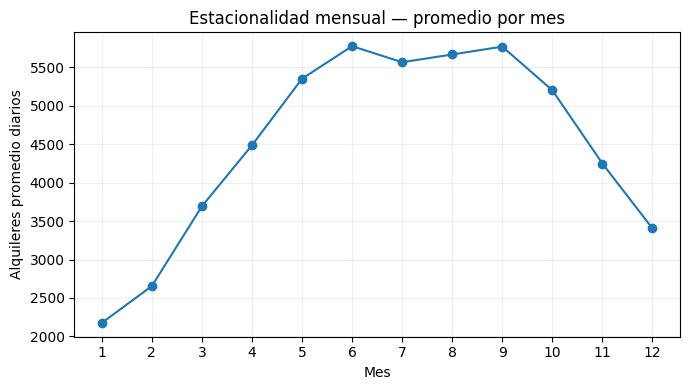

In [269]:

# Estacionalidad mensual
monthly = daily.groupby('mnth', as_index=False)['cnt'].mean()
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(monthly['mnth'], monthly['cnt'], marker='o')
ax.set_xticks(range(1,13))
ax.set_xlabel("Mes")
ax.set_ylabel("Alquileres promedio diarios")
ax.ticklabel_format(axis='y', style='plain', useOffset=False)
ax.set_title("Estacionalidad mensual ‚Äî promedio por mes")
ax.grid(alpha=0.2)
fig.tight_layout()
plt.show()

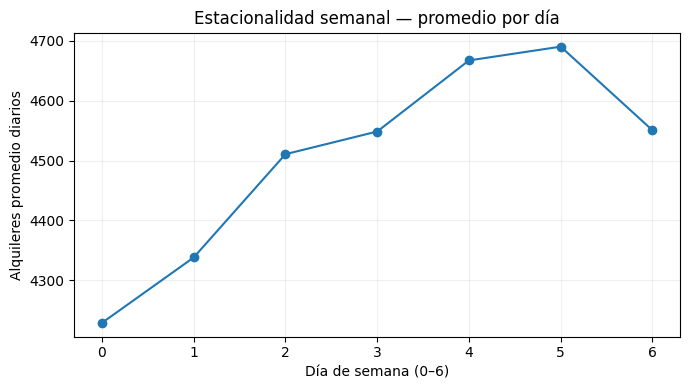

In [270]:
# Estacionalidad semanal
weekly = daily.groupby('weekday', as_index=False)['cnt'].mean()
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(weekly['weekday'], weekly['cnt'], marker='o')
ax.set_xticks(range(0,7))
ax.set_xlabel("D√≠a de semana (0‚Äì6)")
ax.set_ylabel("Alquileres promedio diarios")
ax.ticklabel_format(axis='y', style='plain', useOffset=False)
ax.set_title("Estacionalidad semanal ‚Äî promedio por d√≠a")
ax.grid(alpha=0.2)
fig.tight_layout()
plt.show()

Split temporal 80/20

In [271]:
# --- D.3: Split temporal ---
split_idx = int(len(daily) * 0.8)
train_df = daily.iloc[:split_idx].copy()
test_df  = daily.iloc[split_idx:].copy()

y_tr = train_df['cnt'].values
y_te = test_df['cnt'].values

num_cols = ['temp','atemp','hum','windspeed']
cat_cols = ['season','mnth','weekday','workingday','weathersit']

print("Train/Test:", train_df.shape, test_df.shape)
print("Train:", train_df['dteday'].min().date(), "‚Üí", train_df['dteday'].max().date())
print("Test :", test_df['dteday'].min().date(),  "‚Üí", test_df['dteday'].max().date())

Train/Test: (584, 11) (147, 11)
Train: 2011-01-01 ‚Üí 2012-08-06
Test : 2012-08-07 ‚Üí 2012-12-31


Pipeline (Poly(2) a num√©ricas, OneHot a categ√≥ricas, escalado)

In [272]:
# --- D.4: Preprocesamiento y modelos ---
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

num_pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler())
])

pre = ColumnTransformer([
    ('num', num_pipe, num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

tscv   = TimeSeriesSplit(n_splits=5)
alphas = np.logspace(-3, 2, 30)

pipe_lin   = Pipeline([('pre', pre), ('lin',   LinearRegression())])
pipe_ridge = Pipeline([('pre', pre), ('ridge', RidgeCV(alphas=alphas, cv=tscv))])
pipe_lasso = Pipeline([('pre', pre), ('lasso', LassoCV(alphas=alphas, cv=tscv, max_iter=20000, random_state=42))])


Entrenar, m√©tricas y tabla comparativa

In [273]:
# --- D.5: Entrenar y evaluar ---
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

rows = []


In [ ]:
# Linear
pipe_lin.fit(train_df, y_tr)
yhat_lin = pipe_lin.predict(test_df)
rows.append({"Modelo":"Linear",
             "R2_test":round(r2_score(y_te, yhat_lin),4),
             "MSE_test":round(mean_squared_error(y_te, yhat_lin),2),
             "coef‚â†0":None})


In [275]:
# RidgeCV
pipe_ridge.fit(train_df, y_tr)
yhat_ridge = pipe_ridge.predict(test_df)
alpha_r = pipe_ridge.named_steps['ridge'].alpha_
nnz_r   = int((np.abs(pipe_ridge.named_steps['ridge'].coef_) > 1e-12).sum())
rows.append({"Modelo":f"RidgeCV (alpha={alpha_r:.4g})",
             "R2_test":round(r2_score(y_te, yhat_ridge),4),
             "MSE_test":round(mean_squared_error(y_te, yhat_ridge),2),
             "coef‚â†0":nnz_r})

In [276]:
# LassoCV
pipe_lasso.fit(train_df, y_tr)
yhat_lasso = pipe_lasso.predict(test_df)
alpha_l = pipe_lasso.named_steps['lasso'].alpha_
nnz_l   = int((np.abs(pipe_lasso.named_steps['lasso'].coef_) > 1e-12).sum())
rows.append({"Modelo":f"LassoCV (alpha={alpha_l:.4g})",
             "R2_test":round(r2_score(y_te, yhat_lasso),4),
             "MSE_test":round(mean_squared_error(y_te, yhat_lasso),2),
             "coef‚â†0":nnz_l})

df_bike_cmp = pd.DataFrame(rows)
df_bike_cmp

C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.212e+04, tolerance: 3.721e+03
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.281e+05, tolerance: 3.721e+03
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\loc

Modelo  R2_test     MSE_test  coef‚â†0
0                    Linear  -6.3189  25720119.84     NaN
1  RidgeCV (alpha=0.004894)  -0.3376   4700679.17    42.0
2     LassoCV (alpha=1.887)  -0.3254   4657847.87    31.0

Predicho vs Real

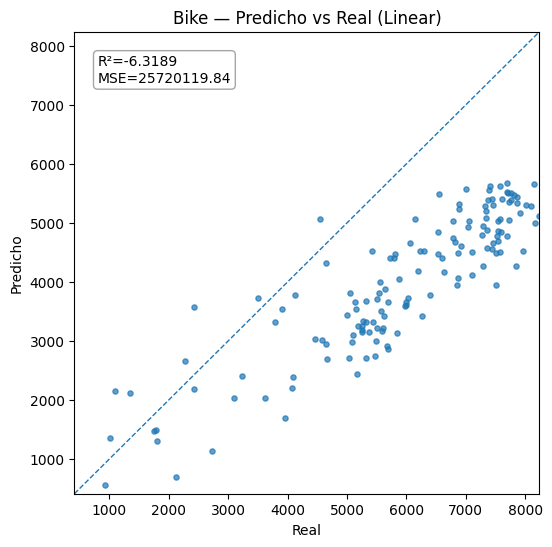

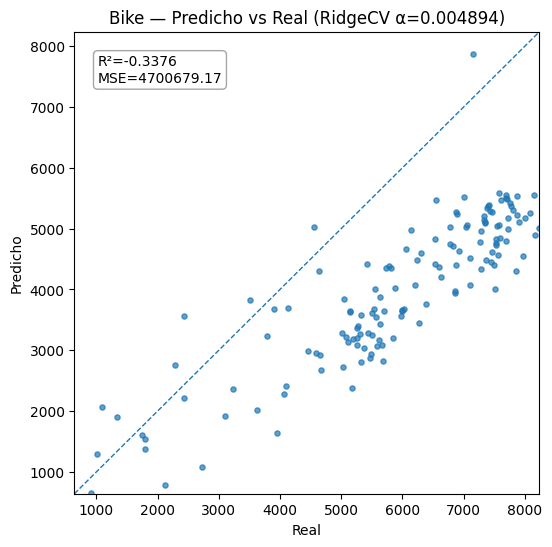

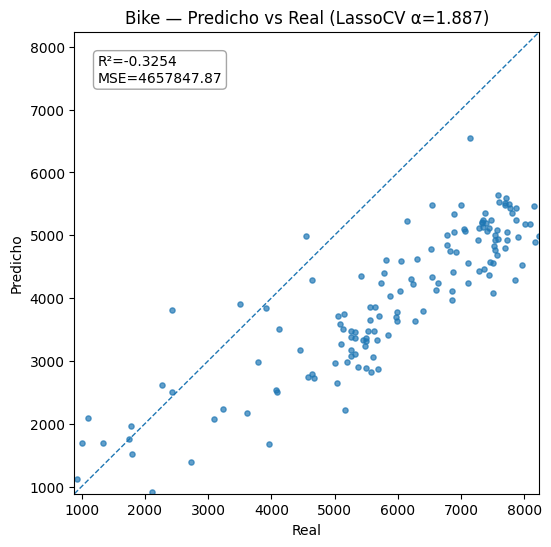

In [279]:
# --- D.6: Predicho vs Real (rango robusto y sin offsets de 1e3) ---
import matplotlib.pyplot as plt

def scatter_pred_true(y_true, y_pred, title, annotate=True):
    y_true = np.asarray(y_true); y_pred = np.asarray(y_pred)
    # rango por percentiles para que un outlier no distorsione el gr√°fico
    lo = np.percentile(np.r_[y_true, y_pred], 1)
    hi = np.percentile(np.r_[y_true, y_pred], 99)
    fig, ax = plt.subplots(figsize=(6,6))
    ax.scatter(y_true, y_pred, s=14, alpha=0.7)
    ax.plot([lo, hi], [lo, hi], '--', lw=1)
    ax.set_xlim(lo, hi); ax.set_ylim(lo, hi)
    ax.set_xlabel("Real"); ax.set_ylabel("Predicho")
    ax.set_title(title)
    if annotate:
        r2 = r2_score(y_true, y_pred)
        mse = mean_squared_error(y_true, y_pred)
        ax.text(0.05, 0.95, f"R¬≤={r2:.4f}\nMSE={mse:.2f}", transform=ax.transAxes,
                verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.7))

scatter_pred_true(y_te, yhat_lin,   "Bike ‚Äî Predicho vs Real (Linear)")
scatter_pred_true(y_te, yhat_ridge, f"Bike ‚Äî Predicho vs Real (RidgeCV Œ±={alpha_r:.4g})")
scatter_pred_true(y_te, yhat_lasso, f"Bike ‚Äî Predicho vs Real (LassoCV Œ±={alpha_l:.4g})")


Paths de coeficientes en el espacio transformado

In [280]:

# --- D.7: Paths Ridge/Lasso en el espacio transformado ---
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from scipy import sparse


In [281]:
# fijar y transformar con el preprocesador
pre.fit(train_df)
Z_train = pre.transform(train_df)
Z_test  = pre.transform(test_df)


In [282]:
# asegurar denso si OHE es sparse
if sparse.issparse(Z_train):
    Z_train = Z_train.toarray()
    Z_test  = Z_test.toarray()

In [ ]:

# nombres de columnas transformadas
try:
    feat_names = pre.get_feature_names_out()
except Exception:
    feat_names = [f"f{i}" for i in range(Z_train.shape[1])]

alphas = np.logspace(-3, 2, 30)
coefs_ridge = []
coefs_lasso = []

for a in alphas:
    rr = Ridge(alpha=a, random_state=42).fit(Z_train, y_tr)
    ll = Lasso(alpha=a, max_iter=20000, random_state=42).fit(Z_train, y_tr)
    coefs_ridge.append(rr.coef_)
    coefs_lasso.append(ll.coef_)

coefs_ridge = np.array(coefs_ridge)
coefs_lasso = np.array(coefs_lasso)


C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.929e+08, tolerance: 1.866e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.915e+08, tolerance: 1.866e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-package

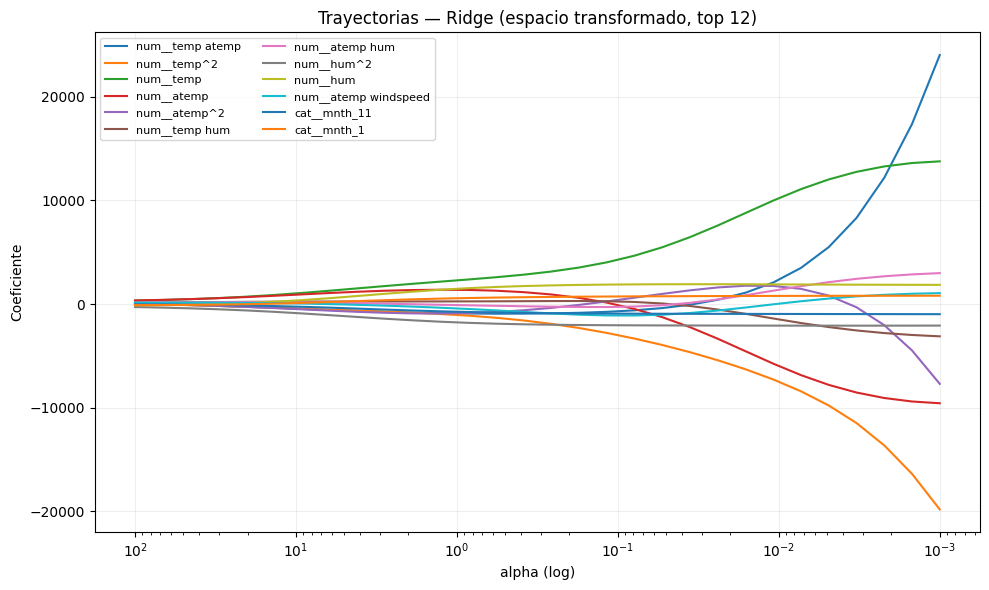

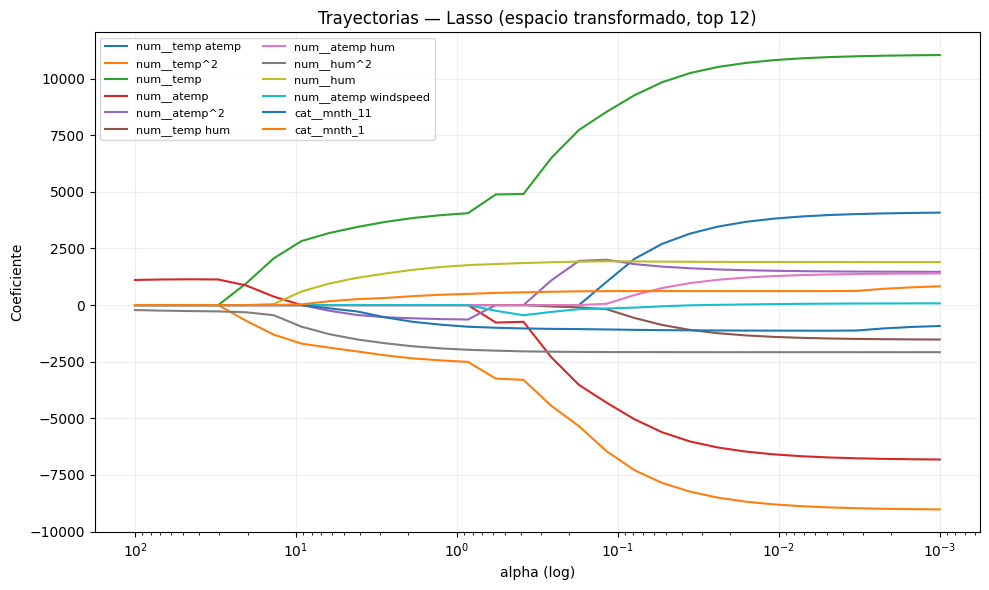

In [285]:
# selecciona las 12 features m√°s influyentes (|coef| grande en alpha peque√±o)
top_idx = np.argsort(np.abs(coefs_ridge[0]))[::-1][:12]

def plot_paths(C, title):
    fig, ax = plt.subplots(figsize=(10,6))
    for i in top_idx:
        ax.plot(alphas, C[:, i], label=feat_names[i])
    ax.set_xscale("log")
    ax.invert_xaxis()
    ax.set_xlabel("alpha (log)")
    ax.set_ylabel("Coeficiente")
    ax.set_title(title)
    ax.grid(alpha=0.2)
    ax.legend(fontsize=8, ncol=2, loc="best")
    fig.tight_layout()
    plt.show()

plot_paths(coefs_ridge, "Trayectorias ‚Äî Ridge (espacio transformado, top 12)")
plot_paths(coefs_lasso, "Trayectorias ‚Äî Lasso (espacio transformado, top 12)")


## Conclusiones

- **OLS vs. GD**: GD converge a par√°metros cercanos a OLS con datos estandarizados; el *learning rate* afecta la velocidad y estabilidad (lr alto puede divergir, lr bajo converge lento).  
- **Ridge vs. Lasso**: Ridge reduce varianza y estabiliza con multicolinealidad; Lasso induce *sparsity* (coeficientes exactamente 0), √∫til para selecci√≥n de variables.  
- **Selecci√≥n de Œ± (CV)**: La validaci√≥n cruzada eligi√≥ Œ± que minimiza el error esperado; con features polinomiales (grado 2), la regularizaci√≥n mejora generalizaci√≥n y controla el sobreajuste.  
- **Bike rentals (temporal)**: Con split por fecha (no aleatorio), los modelos capturan mejor estacionalidad; Lasso puede simplificar el modelo con buen desempe√±o; Ridge suele ser m√°s estable cuando hay muchas interacciones polinomiales.  
- **M√©tricas**: Reportamos R¬≤ y MSE en test para OLS, GD, RidgeCV y LassoCV; Lasso muestra menor n√∫mero de coeficientes ‚â† 0, confirmando su capacidad de selecci√≥n.
